<a href="https://colab.research.google.com/github/flrain2/test/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KoNLPy 한국어 처리 패키지  
https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

# KoNLPy 형태소 분석기

- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  - http://semanticweb.kaist.ac.kr/hannanum/

- Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.

  - http://kkma.snu.ac.kr/

- Komoran: 코모란. Shineware에서 개발.

  - https://github.com/shin285/KOMORAN

- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  - https://github.com/open-korean-text/open-korean-text

- Kahiii카이 KoNLPy 형태소 분석기: 카카오 한국어 형태소 분석기/ 윈도우에서 사용 불가능

## 말뭉치 예제

헌법: kolaw

국회법안: kobill

국립국어원(모두의말뭉치): https://corpus.korean.go.kr/#down

In [ ]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [ ]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 460kB 48.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

## 명사 추출

In [ ]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [ ]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [ ]:
# komoran은 빈줄이 있으면 에러가 남
komoran.nouns("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [ ]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

## 형태소+품사

In [ ]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [ ]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [ ]:
# komoran은 빈줄이 있으면 에러가 남
komoran.pos("\n".join([s for s in c[:40].split("\n") if s]))

[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB')]

In [ ]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

태그의 기호와 의미는 tagset 속성으로 확인할 수 있음

In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
import pandas as pd

In [ ]:
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


SKplanet Tacademy: https://www.youtube.com/watch?v=F8b0jGyZ_W8

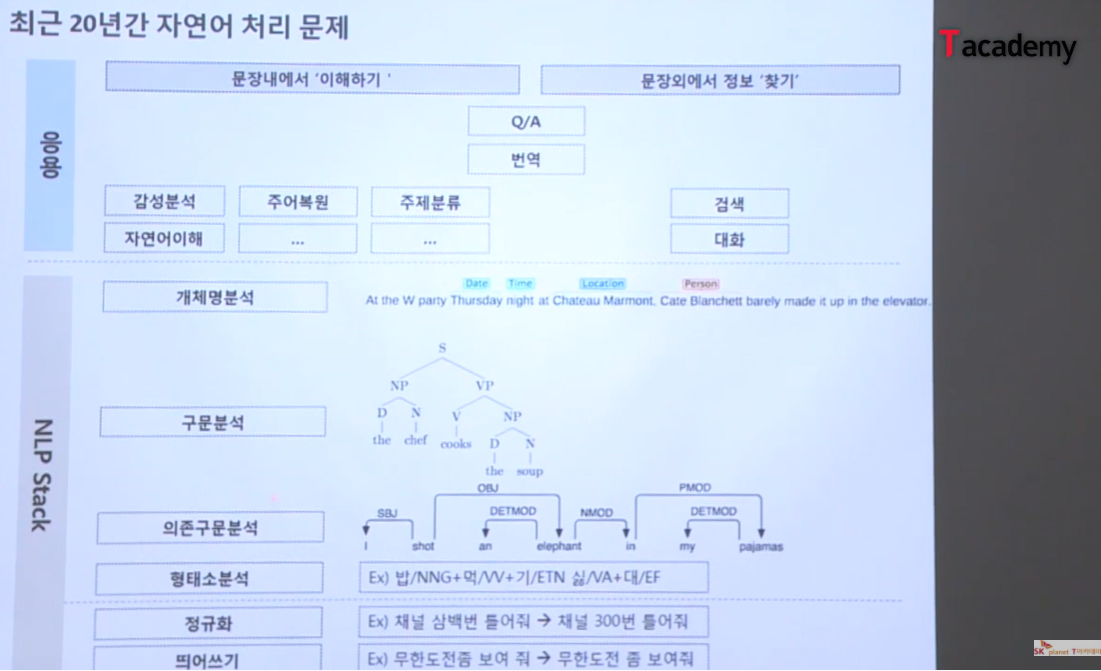

BERT: 
  https://brunch.co.kr/@yj5wqu/23

  https://ebbnflow.tistory.com/151

sk tacademy bert:  https://www.youtube.com/watch?v=riGc8z3YIgQ

  https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb

FinBERT: https://jeonsworld.github.io/NLP/finbert/

SQuAD: https://rajpurkar.github.io/SQuAD-explorer/

KorQuAD: https://korquad.github.io/


BERT(Bi-directional Encoder Representations from Transformers)

- 구글에서 개발한 NLP(자연어처리) 사전 훈련 기술이며, 특정 분야에 국한된 기술이 아니라 모든 자연어 처리 분야에서 좋은 성능을 내는 범용 Language Model입니다. 11개 이상의 자연어처리 과제에서 BERT가 최첨단 성능을 발휘하였고, BERT는 지금까지 자연어처리에 활용하였던 앙상블 모델보다 더 좋은 성능을 내고 있어서 많은 관심을 받고 있는 언어모델 입니다.

bert논문(2018): https://mino-park7.github.io/nlp/2018/12/12/bert-%EB%85%BC%EB%AC%B8%EC%A0%95%EB%A6%AC/?fbclid=IwAR3S-8iLWEVG6FGUVxoYdwQyA-zG0GpOUzVEsFBd0ARFg4eFXqCyGLznu7w

### 11개 이상의 자연어처리 과제

- GLUE datasets
  
  - MNLI: 현재문장 다음에 이어지는 문장이 문맥상 이어지는 문장인지, 반대되는 문장인지, 상관없는 문장인지 분류를 위한 데이터 셋

  - QQP: 두 질문이 의미상 같은지 다른지 분류를 위한 데이터셋

  - QNLI: 질의응답 데이터셋

  - SST-2: 영화리뷰 문장에 관한 감성분석을 위한 데이터셋

  - CoLA: 문법적으로 맞는 문장인지 틀린 문장인지 분류를 위한 데이터셋

  - STS-B: 뉴스 헤드라인과 사람이 만든 문장이 의미상 같은 문장인지 비교를 위한 데이터셋

  - MRPC: 뉴스의 내용과 사람이 만든 문장이 의미상 같은 문장인지 비교를 위한 데이터 셋

  - RTE: MNLI와 유사하나 상대적으로 훨씬 적은 학습 데이터셋

  - WNLI: 문장분류 데이터셋 
  
  - MRPC: 뉴스의 내용과 사람이 만든 문장이 의미상 같은 문장인지 비교를 위한 데이터 셋


- SQuAD: 스탠포드 질문 데이터셋(Stanford Question Answering Dataset)의 약자로써 위키피디아의 기사 집합에 대해 군중들이 제가한 질문으로 구성된 독해 데이터 집합

- CoNLL: 개체명 분류 데이터셋

- SWAG: 현재문장 다음에 이어질 자연스러운 문장을 선택하기 위한 데이터셋

XLNet: https://jeonsworld.github.io/NLP/xlnet/